In [1]:
# Module E: Differentiation and Taylor Approximation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def my_der_calc(f: callable,
                a: int,
                b: int,
                N: int,
                option) -> np.array:
    """
    Derivative Calculator

    :param f: Function to be differentiated
    :param a: Lower bound of the interval
    :param b: Upper bound of the interval
    :param N: Number of intervals
    :param option: FORWARD, CENTRAL, or BACKWARD
    :return: Derivative of the function
    """

    if N < 10:
        raise ValueError("N must be at least 10")

    # Calculate the x values
    x: np.array = np.linspace(a, b, N)

    # Calculate the y values
    y: np.array = f(x)

    _i = 0

    # Calculate the derivative
    if option == "FORWARD":
        der = np.zeros(N-1)

        # Forward difference
        for i in range(1, N):
            der[_i] = ((y[i] - y[i-1])/(x[i] - x[i-1]))
            _i += 1

    elif option == "CENTRAL":
        der = np.zeros(N-2)

        # Central difference
        for i in range(1, N-1):
            der[_i] = ((y[i+1] - y[i-1])/(x[i+1] - x[i-1]))
            _i += 1

    elif option == "BACKWARD":
        der = np.zeros(N-1)

        # Backward difference
        for i in range(0, N-1):
            der[_i] = ((y[i+1] - y[i])/(x[i+1] - x[i]))
            _i += 1
    else:
        raise ValueError("Invalid option")

    return der

Text(0.5, 1.0, "f'(x) Approximations (N = 200)")

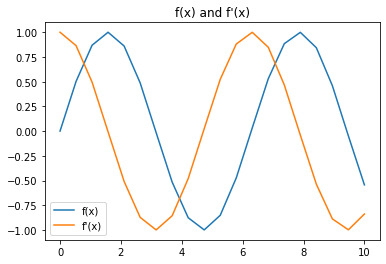

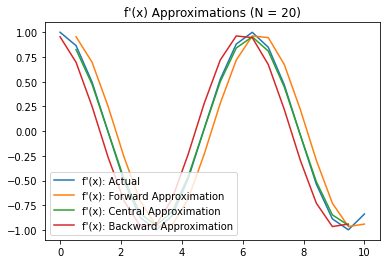

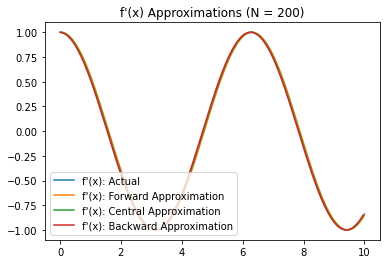

In [4]:
# Test my_der_calc
_f_test = lambda x: np.sin(x)
_f_n = 20
_f_x = np.linspace(0, 10, _f_n)

# Plot the derivative
plt.figure(1)
plt.plot(_f_x, _f_test(_f_x), label = 'f(x)')
plt.plot(_f_x, np.cos(_f_x), label = 'f\'(x)')
plt.legend()
plt.title("f(x) and f\'(x)")

plt.figure(2)
plt.plot(_f_x, np.cos(_f_x), label = 'f\'(x): Actual')
plt.plot(_f_x[1:], my_der_calc(_f_test, 0, 10, _f_n, "FORWARD"), label = 'f\'(x): Forward Approximation')
plt.plot(_f_x[1:-1], my_der_calc(_f_test, 0, 10, _f_n, "CENTRAL"), label = 'f\'(x): Central Approximation')
plt.plot(_f_x[:-1], my_der_calc(_f_test, 0, 10, _f_n, "BACKWARD"), label = 'f\'(x): Backward Approximation')
plt.legend(loc = 'lower left')
plt.title(f"f'(x) Approximations (N = {_f_n})")

_f_n = _f_n * 10
_f_x = np.linspace(0, 10, _f_n)
plt.figure(3)
plt.plot(_f_x, np.cos(_f_x), label = 'f\'(x): Actual')
plt.plot(_f_x[1:], my_der_calc(_f_test, 0, 10, _f_n, "FORWARD"), label = 'f\'(x): Forward Approximation')
plt.plot(_f_x[1:-1], my_der_calc(_f_test, 0, 10, _f_n, "CENTRAL"), label = 'f\'(x): Central Approximation')
plt.plot(_f_x[:-1], my_der_calc(_f_test, 0, 10, _f_n, "BACKWARD"), label = 'f\'(x): Backward Approximation')
plt.legend(loc = 'lower left')
plt.title(f"f'(x) Approximations (N = {_f_n})")

In [5]:
def my_num_diff_smooth(x: np.array,
                       y: np.array,
                       n: int):

    if x.shape != y.shape:
        raise ValueError("x and y must be the same shape")

    # Initialize the derivative array
    y_smooth = np.zeros(x.shape[0] - 2*n)
    der = np.zeros(y_smooth.shape[0] - 2)

    # Smooth the data
    for i in range(n, y.shape[0] - n):
        _min = i - n
        _max = i + n
        y_smooth[_min] = np.mean(y[_min : _max])

    # Calculate the derivative
    _i = 0
    for i in range(1, y_smooth.shape[0] - 1):
        der[_i] = ((y_smooth[i+1] - y_smooth[i-1]) / (x[i+1] - x[i-1]))
        _i += 1

    return der, x[n+1:-n-1]

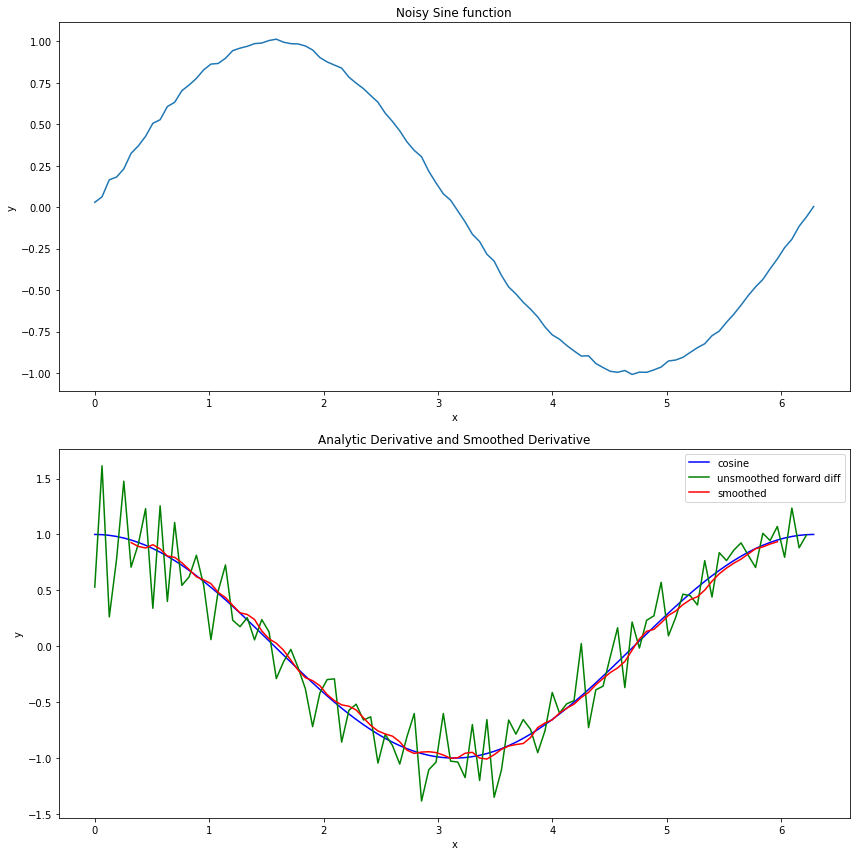

In [6]:
# Test my_num_diff_smooth
def test_my_num_diff_smooth():
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x) + np.random.randn(len(x))/100
    [dy, X] = my_num_diff_smooth(x, y, 4)
    plt.figure(figsize = (12, 12))
    plt.subplot(211)
    plt.plot(x, y)
    plt.title('Noisy Sine function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(212)

    plt.plot(x, np.cos(x), 'b', label = 'cosine')
    plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g',
             label = 'unsmoothed forward diff')
    plt.plot(X, dy, 'r', label = 'smoothed')
    plt.title('Analytic Derivative and Smoothed Derivative')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()

test_my_num_diff_smooth()